# 1. Build your own convolutional neural network using pytorch

In [ ]:
!git clone https://github.com/YoushanZhang/SCTL.git

Cloning into 'SCTL'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 148 (delta 37), reused 5 (delta 3), pack-reused 84
Receiving objects: 100% (148/148), 75.55 MiB | 22.17 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [ ]:
# unzip file
!unzip SCTL/Train_1 -d Train/
!unzip SCTL/Train_2 -d Train/

Archive:  SCTL/Train_1.zip
   creating: Train/Score_1/
  inflating: Train/Score_1/20200724_093921_LH_C1_PP_M.jpg  
  inflating: Train/Score_1/20200724_093926_LF_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_093926_RH_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_093930_RH_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_093935_LH_C1_PP_M.jpg  
  inflating: Train/Score_1/20200724_093940_LF_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_093940_RF_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_094011_LF_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_094011_RF_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_094011_RH_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_094108_LH_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_094108_RH_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_094117_LF_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_094117_RF_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_094122_LF_C1_PN_M.jpg  
  inflating: Train/Score_1/20200724_094122_RF

In [ ]:
# Unzip the test file
!unzip SCTL/Test.zip -d Test

Archive:  SCTL/Test.zip
   creating: Test/Test/
  inflating: Test/Test/20200724_093921_RF_C2_PP_M.jpg  
  inflating: Test/Test/20200724_093926_LH_C1_PN_M.jpg  
  inflating: Test/Test/20200724_093930_LF_C1_PN_M.jpg  
  inflating: Test/Test/20200724_093930_LH_C3_PN_M.jpg  
  inflating: Test/Test/20200724_093935_RF_C2_PP_M.jpg  
  inflating: Test/Test/20200724_093940_LH_C1_PP_M.jpg  
  inflating: Test/Test/20200724_093940_RH_C1_PN_M.jpg  
  inflating: Test/Test/20200724_094015_LF_C2_PN_M.jpg  
  inflating: Test/Test/20200724_094015_RH_C2_PN_M.jpg  
  inflating: Test/Test/20200724_094108_LF_C1_PP_M.jpg  
  inflating: Test/Test/20200724_094108_RF_C1_PN_M.jpg  
  inflating: Test/Test/20200724_094117_LH_C1_PN_M.jpg  
  inflating: Test/Test/20200724_094126_LF_C1_PN_M.jpg  
  inflating: Test/Test/20200724_094126_LH_C2_PN_M.jpg  
  inflating: Test/Test/20200724_094126_RF_C1_PN_M.jpg  
  inflating: Test/Test/20200724_094126_RH_C2_PN_M.jpg  
  inflating: Test/Test/20200724_094157_LF_C2_PN_M.jpg  


In [ ]:
# import required libraries
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import torchvision.transforms as transforms
from torchvision.io import read_image
from torch.utils.data import  random_split

In [ ]:
# import the required libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class YourCNN(nn.Module):
    def __init__(self):
        super(YourCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

        # Max pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 9 * 9, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 4)  # Assuming 4 output classes

    def forward(self, x):
        # Convolutional layers with ReLU activation and max pooling
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)

        # Flatten the tensor for fully connected layers
        x = x.view(-1, 64 * 9 * 9)

        # Fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

# Create an instance of the CNN
model = YourCNN()


# 2. Train your model using cow teat datasets (you may need to use  Google Colab (or Kaggle) with GPU to train your code)

### (1) use torchvision.datasets.ImageFolder for the training dataset
### (2) use custom dataloader for test dataset (return image tensor and file name)

In [ ]:
# apply the image transformation
transform = transforms.Compose([
    transforms.Resize((75, 75)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
# Dataset
dataset = torchvision.datasets.ImageFolder(root='Train/', transform=transform)
# train size
train_size = int(0.9 * len(dataset))
# test size
test_size = len(dataset) - train_size
#  random_split to split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
# size of the batch
batch_size=4
# train loader
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)
# test loader
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)
# data loader
dataloaders={'train':trainloader,'val':testloader}
# dataset size
dataset_sizes = {'train': len(train_dataset),'val':len(test_dataset)}
class_names = dataset.classes

In [ ]:
from torch.optim import lr_scheduler
# Loss function
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9,weight_decay = 0.0005)

In [ ]:
# scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

In [ ]:
# Determine if the GPU is there
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Move network and criterion to device
model =model.to(device)
loss_fn=loss_fn.to(device)
print(optimizer)

cpu
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    initial_lr: 0.001
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0005
)


In [ ]:
# import the required libraries
from sklearn.metrics import accuracy_score

In [ ]:
epochs = 50

In [ ]:
# looping construct
for epoch in range(epochs):
    model.train()
    epoch_loss =0
    for j,data in tqdm(enumerate(trainloader),total=len(trainloader)):

        inputs,labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

# epoch loss
        epoch_loss = epoch_loss+ loss.item()* inputs.size(0)
    scheduler.step()
    if epoch%10==0:
      with torch.no_grad():

        model.eval()
        val_loss =0
        corrects=0
        for k,data in enumerate(testloader):
          inputs,labels = data
          inputs = inputs.to(device)
          labels = labels.to(device)
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = loss_fn(outputs,labels)
          val_loss = val_loss + loss.item()*inputs.size(0)
          corrects += torch.sum(preds == labels.data)

        print('Validation loss occured :',loss.item()/len(test_dataset))

        print('The Accuarcy Score :',corrects/len(test_dataset))

    print(f' epoch:{epoch} loss =',epoch_loss/len(train_dataset))


100%|██████████| 259/259 [00:22<00:00, 11.68it/s]


Validation loss occured : 0.00934916993846064
The Accuarcy Score : tensor(0.4870)
 epoch:0 loss = 1.2688851476407375


100%|██████████| 259/259 [00:22<00:00, 11.74it/s]


 epoch:1 loss = 1.1372151559280013


100%|██████████| 259/259 [00:22<00:00, 11.48it/s]


 epoch:2 loss = 1.0726851555780008


100%|██████████| 259/259 [00:22<00:00, 11.30it/s]


 epoch:3 loss = 1.034591292735456


100%|██████████| 259/259 [00:22<00:00, 11.42it/s]


 epoch:4 loss = 1.0119798901694426


100%|██████████| 259/259 [00:21<00:00, 11.85it/s]


 epoch:5 loss = 0.9821598735030892


100%|██████████| 259/259 [00:22<00:00, 11.40it/s]


 epoch:6 loss = 0.9671299497901356


100%|██████████| 259/259 [00:22<00:00, 11.40it/s]


 epoch:7 loss = 0.9599081275541501


100%|██████████| 259/259 [00:22<00:00, 11.39it/s]


 epoch:8 loss = 0.9585471411507641


100%|██████████| 259/259 [00:22<00:00, 11.71it/s]


 epoch:9 loss = 0.9386384694673107


100%|██████████| 259/259 [00:22<00:00, 11.41it/s]


Validation loss occured : 0.009427742336107338
The Accuarcy Score : tensor(0.5739)
 epoch:10 loss = 0.9340466214794255


100%|██████████| 259/259 [00:22<00:00, 11.34it/s]


 epoch:11 loss = 0.9273098429351526


100%|██████████| 259/259 [00:22<00:00, 11.34it/s]


 epoch:12 loss = 0.9231027618944069


100%|██████████| 259/259 [00:22<00:00, 11.43it/s]


 epoch:13 loss = 0.9177092523593275


100%|██████████| 259/259 [00:22<00:00, 11.75it/s]


 epoch:14 loss = 0.917331073570067


100%|██████████| 259/259 [00:22<00:00, 11.39it/s]


 epoch:15 loss = 0.9159769449289348


100%|██████████| 259/259 [00:22<00:00, 11.30it/s]


 epoch:16 loss = 0.9111712331698065


100%|██████████| 259/259 [00:22<00:00, 11.33it/s]


 epoch:17 loss = 0.9060280212350694


100%|██████████| 259/259 [00:22<00:00, 11.61it/s]


 epoch:18 loss = 0.9052957762140831


100%|██████████| 259/259 [00:22<00:00, 11.54it/s]


 epoch:19 loss = 0.8989207101283267


100%|██████████| 259/259 [00:22<00:00, 11.34it/s]


Validation loss occured : 0.011012695146643598
The Accuarcy Score : tensor(0.6000)
 epoch:20 loss = 0.8935078535250585


100%|██████████| 259/259 [00:22<00:00, 11.30it/s]


 epoch:21 loss = 0.8879318882925598


100%|██████████| 259/259 [00:22<00:00, 11.35it/s]


 epoch:22 loss = 0.8909953980196836


100%|██████████| 259/259 [00:22<00:00, 11.66it/s]


 epoch:23 loss = 0.8860412936376649


100%|██████████| 259/259 [00:22<00:00, 11.44it/s]


 epoch:24 loss = 0.883364885180785


100%|██████████| 259/259 [00:22<00:00, 11.32it/s]


 epoch:25 loss = 0.8822350235695534


100%|██████████| 259/259 [00:22<00:00, 11.31it/s]


 epoch:26 loss = 0.8792186238779551


100%|██████████| 259/259 [00:22<00:00, 11.34it/s]


 epoch:27 loss = 0.8812311518814854


100%|██████████| 259/259 [00:22<00:00, 11.75it/s]


 epoch:28 loss = 0.885746882316914


100%|██████████| 259/259 [00:22<00:00, 11.34it/s]


 epoch:29 loss = 0.8746081405036454


100%|██████████| 259/259 [00:22<00:00, 11.34it/s]


Validation loss occured : 0.012048996013143787
The Accuarcy Score : tensor(0.5739)
 epoch:30 loss = 0.869737998198725


100%|██████████| 259/259 [00:22<00:00, 11.33it/s]


 epoch:31 loss = 0.8662034387284137


100%|██████████| 259/259 [00:22<00:00, 11.36it/s]


 epoch:32 loss = 0.8678031201749983


100%|██████████| 259/259 [00:22<00:00, 11.66it/s]


 epoch:33 loss = 0.8657478554105851


100%|██████████| 259/259 [00:22<00:00, 11.35it/s]


 epoch:34 loss = 0.8660697045824284


100%|██████████| 259/259 [00:22<00:00, 11.28it/s]


 epoch:35 loss = 0.8648878832273834


100%|██████████| 259/259 [00:22<00:00, 11.34it/s]


 epoch:36 loss = 0.8641359960548651


100%|██████████| 259/259 [00:22<00:00, 11.60it/s]


 epoch:37 loss = 0.8626933805716568


100%|██████████| 259/259 [00:22<00:00, 11.43it/s]


 epoch:38 loss = 0.8617049864343794


100%|██████████| 259/259 [00:22<00:00, 11.34it/s]


 epoch:39 loss = 0.8630074493197916


100%|██████████| 259/259 [00:22<00:00, 11.32it/s]


Validation loss occured : 0.012524311438850735
The Accuarcy Score : tensor(0.5826)
 epoch:40 loss = 0.8576638436870834


100%|██████████| 259/259 [00:22<00:00, 11.30it/s]


 epoch:41 loss = 0.8562711441539934


100%|██████████| 259/259 [00:22<00:00, 11.72it/s]


 epoch:42 loss = 0.8565934272753201


100%|██████████| 259/259 [00:22<00:00, 11.36it/s]


 epoch:43 loss = 0.856121892394134


100%|██████████| 259/259 [00:22<00:00, 11.33it/s]


 epoch:44 loss = 0.8544553699299722


100%|██████████| 259/259 [00:22<00:00, 11.31it/s]


 epoch:45 loss = 0.8535283352005182


100%|██████████| 259/259 [00:22<00:00, 11.30it/s]


 epoch:46 loss = 0.8552651444532885


100%|██████████| 259/259 [00:22<00:00, 11.72it/s]


 epoch:47 loss = 0.8530519646187124


100%|██████████| 259/259 [00:22<00:00, 11.27it/s]


 epoch:48 loss = 0.8517969745270749


100%|██████████| 259/259 [00:22<00:00, 11.29it/s]

 epoch:49 loss = 0.8528034661102111


In [ ]:
# The final Test
final_test = torchvision.datasets.ImageFolder(root='Test/', transform=transform)

In [ ]:
# The final loader
final_loader = torch.utils.data.DataLoader(final_test, batch_size=1,
                                          shuffle=False)

In [ ]:
file_names=[]
predictions =[]

In [ ]:
with torch.no_grad():
      model.eval()
      for k,data in enumerate(final_loader):
        inputs,_ = data
        inputs = inputs.to(device)
        fname, _ = final_loader.dataset.samples[k]
        file_names.append(fname.split('/')[-1])
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        predictions.append(preds.detach().cpu().numpy()[0])
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# 3. Evaluate your model using the developed software

In [ ]:
# Dataframe
df = pd.DataFrame(list(zip(file_names,predictions)))
df
df.to_csv('final_result.csv',index=False,header=False)

In [20]:
# read the image
image = cv2.imread('The_Image.png')

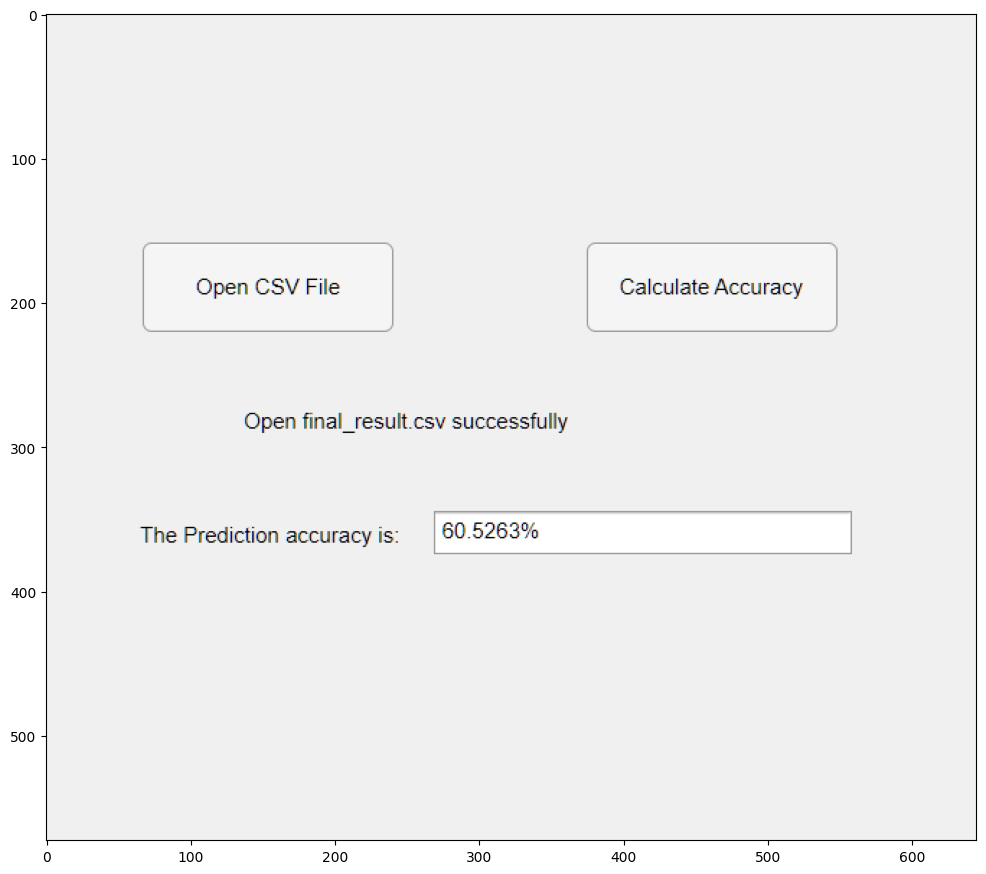

In [21]:
# plot the Figure
plt.figure(figsize=(12,12))
plt.imshow(image)

# 4. Compare results with [SCTL paper](https://www.mdpi.com/2076-2615/12/7/886/htm). Requirement: performance is better than VGG16: 66.8%

In [ ]:
The obtained accuracy is around 60%.

# 5. Write a four-page paper report using the shared LaTex template. Upload your paper to ResearchGate or Arxiv, and put your paper link here.

https://www.researchgate.net/publication/375491139_Dairy_Cows_Teat-End_Classification_using_Deep_Learning